In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('/content/train.csv')

In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<Axes: >

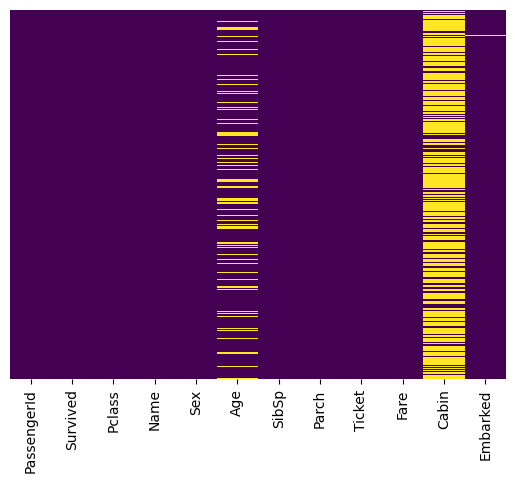

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

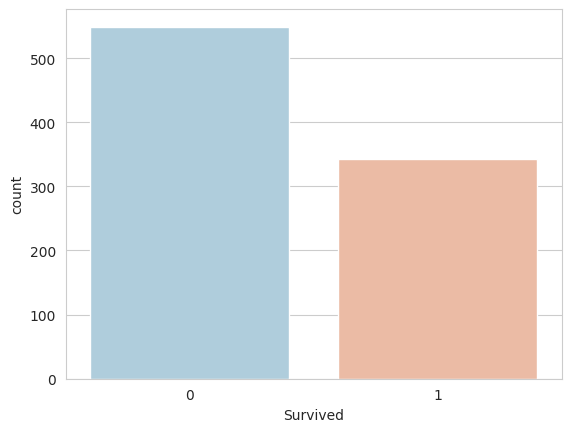

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

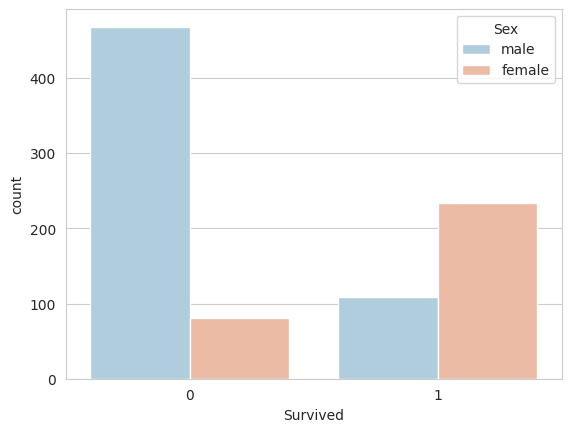

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

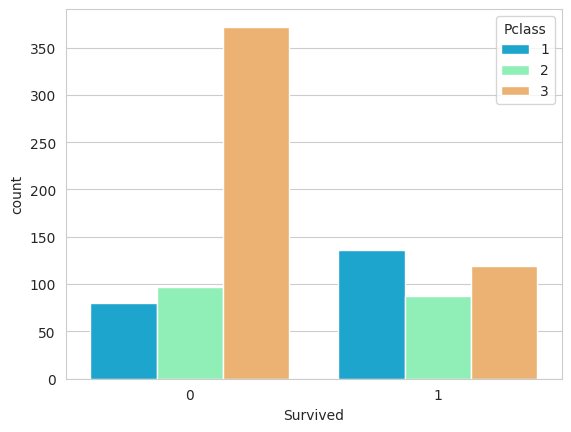

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: >

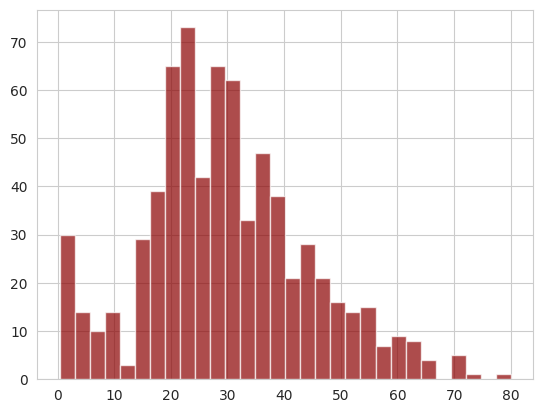

In [9]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

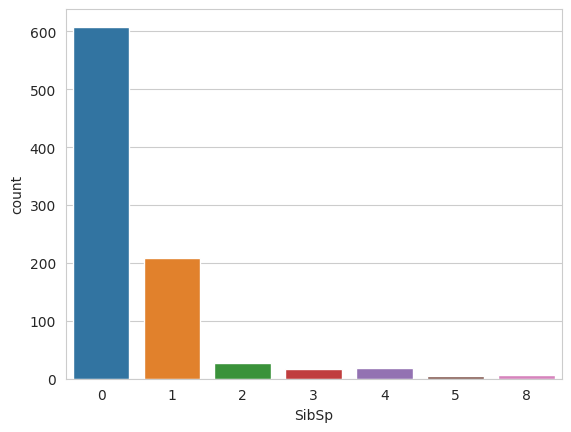

In [10]:
sns.countplot(x='SibSp',data=train)

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [12]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [13]:
train['Embarked'] = train['Embarked'].fillna('S')

<Axes: >

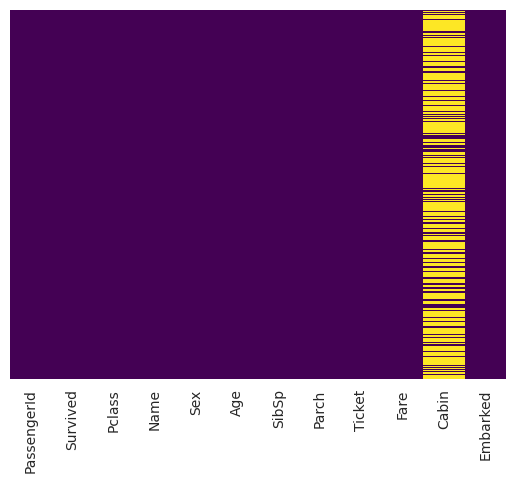

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
train.drop('Cabin',axis=1,inplace=True)

In [16]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
train.dropna(inplace=True)

In [18]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [19]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [20]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [21]:
train = pd.concat([train,sex,embark],axis=1)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1),
                                                    train['Survived'], test_size=0.10,
                                                    random_state=101)

In [24]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
X_test.head()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,332,1,45.5,0,0,28.500,1,0,1
700,701,1,18.0,1,0,227.525,0,0,0
748,749,1,19.0,1,0,53.100,1,0,1
751,752,3,6.0,0,1,12.475,1,0,1
481,482,2,29.0,0,0,0.000,1,0,1


In [25]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1])

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[46  5]
 [19 20]]


In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79        51
           1       0.80      0.51      0.62        39

    accuracy                           0.73        90
   macro avg       0.75      0.71      0.71        90
weighted avg       0.75      0.73      0.72        90



In [28]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
rf_pre=rf.predict(X_test)

In [29]:
print(confusion_matrix(y_test,rf_pre))

[[48  3]
 [14 25]]


In [30]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        51
           1       0.89      0.64      0.75        39

    accuracy                           0.81        90
   macro avg       0.83      0.79      0.80        90
weighted avg       0.83      0.81      0.80        90



In [38]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [40]:
ann  = Sequential()
ann.add(Dense(units= 32, activation = 'relu', input_dim=9))
ann.add(Dense(units= 32, activation = 'relu'))
ann.add(Dense(units= 1, activation = 'sigmoid'))
ann.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [42]:
ann.fit(X_train,y_train, batch_size=32, epochs=20,verbose= 0)

In [43]:
ann_pred = ann.predict(X_test)
ann_pred = [ 1 if y>=0.5 else 0 for y in ann_pred]
print(ann_pred)

3/3 [==============================] - 0s 5ms/step
[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]


In [44]:
print(confusion_matrix(y_test,ann_pred))

[[44  7]
 [25 14]]


In [45]:
print(classification_report(y_test,ann_pred))

              precision    recall  f1-score   support

           0       0.64      0.86      0.73        51
           1       0.67      0.36      0.47        39

    accuracy                           0.64        90
   macro avg       0.65      0.61      0.60        90
weighted avg       0.65      0.64      0.62        90



In [31]:
test = pd.read_csv('/content/test.csv')

<Axes: >

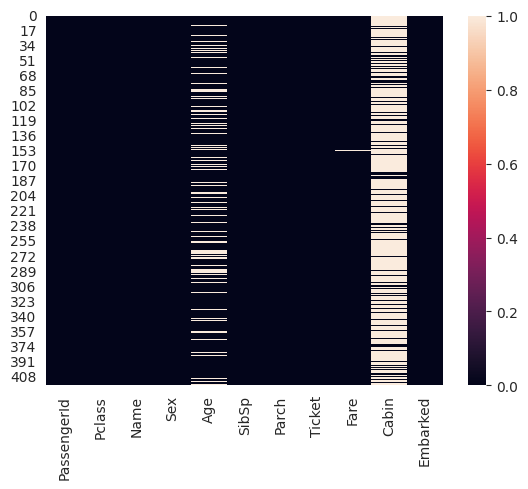

In [32]:
sns.heatmap(test.isnull())

In [33]:
test.drop('Cabin',axis=1,inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [35]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [36]:
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test= pd.get_dummies(test['Embarked'],drop_first=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [37]:
test = pd.concat([test,sex_test,embark_test],axis=1)

In [46]:
ann.fit(train.drop(['Survived'],axis=1),train['Survived'] , epochs=50,verbose= 0)

In [47]:
test_prediction = ann.predict(test)
test_prediction = [ 1 if y>=0.5 else 0 for y in test_prediction]

14/14 [==============================] - 0s 3ms/step


In [48]:
test_pred = pd.DataFrame(test_prediction, columns= ['Survived'])

In [49]:
new_test = pd.concat([test, test_pred], axis=1, join='inner')

In [50]:
df= new_test[['PassengerId' ,'Survived']]

In [51]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [52]:
df.to_csv('predictions.csv' , index=False)